#### <font color = 'green'> Cost effective stochastic model to determine the prevalence cases of breast cancer

##### <font color = 'grey'> Prepared by: `Olanrewaju Adegoke`

###### <font color = 'grey'> This project completely leverage on the use of `self built machine learning pipelines` to train a cost effective predictive model in determining the prevalence of a breast cancer in human. 
###### <font color = 'grey'> In medical practices, getting health related data is very costly and this piece of work focuses on the important parameters to watch out for when carrying out breast cancer diagnosis without having to spent more(time and money) and still able to detect the cancerous state in any human with a `92.9%` level of assurance of true results.

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project\\notebooks'

In [3]:
# Reserved for libraries installations

In [4]:
# Import the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import joblib
from datetime import datetime

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_13696\3881712819.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### <font color = 'green'> Import the full machine learning self built pipelines by olanrewaju

In [6]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project\\resources')

In [7]:
import olanrewaju as ola

In [8]:
dir(ola)

['LabelEncoder',
 'LogisticRegression',
 'MinMaxScaler',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'RFE',
 'RandomForestClassifier',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_num_transform',
 'categorical_data',
 'change_dtype_function',
 'check_wrong_label',
 'concat_df',
 'convert_rfe_features_to_dataframe',
 'dataframe_describe',
 'dataframe_explore',
 'datetime',
 'dropping_columns',
 'duplicate_corrector',
 'feature_selection_rfe',
 'feature_target_selector',
 'file_copy_v2',
 'file_image_saver_versioning_v1',
 'file_load_v4',
 'get_dummy_encoder',
 'joblib',
 'label_encoding',
 'merging_rfe_df',
 'min_max_scaler',
 'mislabel_function_corrector_v2',
 'missing_and_duplicate_checker',
 'missing_value_corrector_v2',
 'norm_scaler',
 'np',
 'numerical_data',
 'one_hot_encoding',
 'ordinal_encoding',
 'os',
 'outliers_correction_iqr',
 'pd',
 'plotting_outliers',
 'plt',
 'sb',
 

In [9]:
# Load the dataset

In [10]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project\\data')

In [11]:
help(ola.file_load_v4)

Help on function file_load_v4 in module olanrewaju:

file_load_v4(main_path, file_path, file_name, file_format)
    This is a file loader function that implements file I/O for the following file formats:
        1. .csv
        2. xlsx or xls
    Inputs:
        order: (main_path, file_path, file_name, file_format)
        main_path: This is the string directory to file location. It is the parent folder that contain the folder that housed the dataset.
        file_path: This is the path to the directory that housed the data written out in string.
        file_name: This is the name of the data or file without the file extension and must be in string also.
        file_format: This is the format of the file you are trying to upload. It can be a csv, xlsx or xls.
                     Please do not add the '.' at the prefix or suffix of any of the file format.

    Outputs:
        The function returns a pandas DataFrame.
        Remember to create a container for the outputs.



In [12]:
main_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_path = 'data'
file_name = 'breast_cancer'
file_format = 'csv'
data = ola.file_load_v4(main_path, file_path, file_name, file_format)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project\\notebooks')

In [14]:
# Explore the data

In [15]:
help(ola.dataframe_explore)

Help on function dataframe_explore in module olanrewaju:

dataframe_explore(file_name)
    This function provides quick overview of any given dataframe.
    Input:
        file_name: This is the dataset that is loaded into the jupyter notebook.

    Outputs:
        info: This shows the information about the dataset.
        shape: This shows the dimension of the dataset.



In [16]:
file_name = data
ola.dataframe_explore(file_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# Statistical description of the data

In [18]:
help(ola.dataframe_describe)

Help on function dataframe_describe in module olanrewaju:

dataframe_describe(file_name)
    This function provides quick statistical overview of any given dataframe.
    Input:
        file_name: This is the dataset that is loaded into the jupyter notebook.

    Output:
        stat: This shows the statistical description about the dataset.



In [19]:
file_name = data
ola.dataframe_describe(file_name)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
# Dropping the id column

In [21]:
help(ola.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [22]:
file = data
columns = ['id']
data = ola.dropping_columns(file, columns)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Checking for wrong label

In [24]:
help(ola.check_wrong_label)

Help on function check_wrong_label in module olanrewaju:

check_wrong_label(file)
    This function go through a dataset and returns column names and the unique labels in each columns.
    The input is the dataset itself.
    Input:
        file: This is the dataset.
    Output:
        The function print out each columns and the unique labels in the dataset.



In [25]:
file = data
ola.check_wrong_label(file)

diagnosis:['M' 'B']
radius_mean:[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8  

There are no mislabel in the dataset.

In [26]:
# Missing Values and Duplicates

In [27]:
help(ola.missing_and_duplicate_checker)

Help on function missing_and_duplicate_checker in module olanrewaju:

missing_and_duplicate_checker(file_name)
    This function provides quick statistical overview of any given dataframe.
    Input:
        file_name: This is the dataset that is loaded into the jupyter notebook.

    Outputs:
        missing_value: This shows the summary report for missing values in the dataset.
        duplicate_value: This shows the summary report for duplicated entries in the dataset.
        percent_missing_value: This shows the proportion of the missing values on the total number of entries in the data.
                                This is important for us to know if we should drop or apply other alternative to correcting the missing values.



In [28]:
file_name = data
ola.missing_and_duplicate_checker(file_name)



There are 0 duplicates entries in the dataset.

This is the percentage of the missing value in each column: 
 diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave_points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave_points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave_points_worst

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing and duplicates in the data

In [29]:
# Outliers detection

In [30]:
help(ola.plotting_outliers)

Help on function plotting_outliers in module olanrewaju:

plotting_outliers(file)
    This function only plot the outliers in the dataset.
    Input:
        file: This is the pandas dataframe.
    Output:
        The function returns a plot of the outliers.



<Axes: ylabel='radius_mean'>

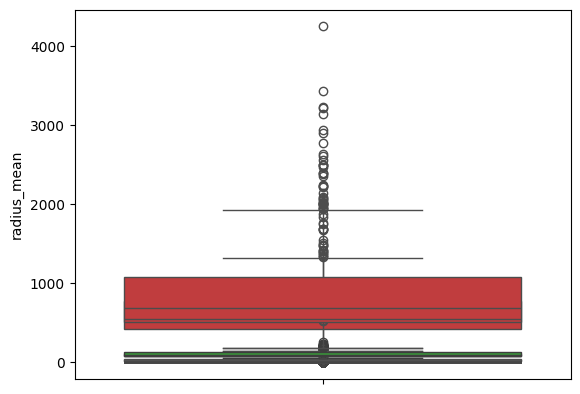

In [31]:
file = data
ola.plotting_outliers(file)

In [32]:
# Correcting Outliers

In [33]:
help(ola.outliers_correction_iqr)

Help on function outliers_correction_iqr in module olanrewaju:

outliers_correction_iqr(file, iqr_multiplier=1.5)
    This function correct outliers in a DataFrame using the interquartile range (IQR) strategy with an automatic strategy selection.

    Inputs:
        file: This is the dataset in pandas. This contains both numerical and categorical columns.
        iqr_multiplier: This is constant factor multiplier for IQR and is float, optional (default=1.5)
        The multiplier determines the threshold for identifying outliers based on IQR.

    Returns:
        DataFrame: It returns a pandas dataframe without outliers.
        DataFrame with outliers corrected based on automatically selected strategy.



In [34]:
file = data
data = ola.outliers_correction_iqr(file, iqr_multiplier=1.5)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.06154,0.14710,0.2419,...,25.38,17.33,184.60,686.5,0.1622,0.2119,0.7119,0.2654,0.2822,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,686.5,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.09587,0.09263,0.24140,0.10520,0.1792,...,14.91,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.2575,0.2822,0.08004
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: ylabel='radius_mean'>

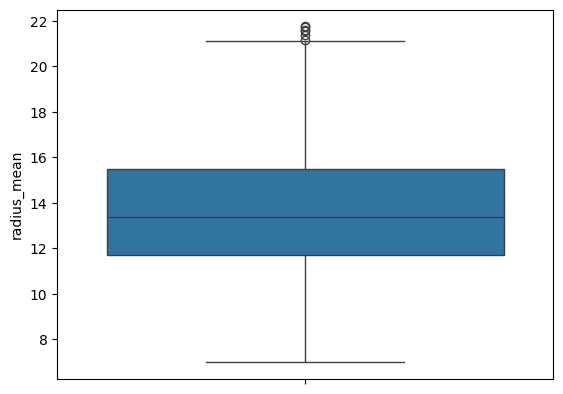

In [35]:
sb.boxplot(data['radius_mean'])

<Axes: ylabel='radius_mean'>

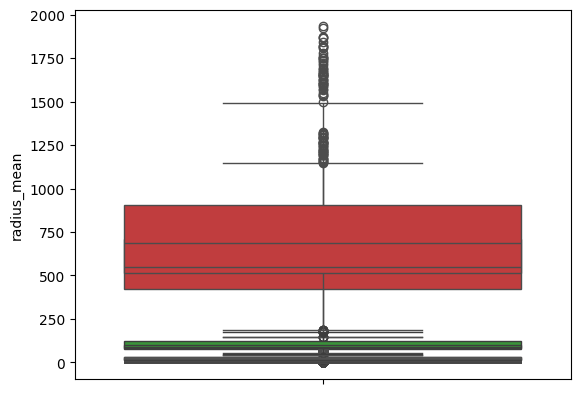

In [36]:
file = data
ola.plotting_outliers(file)

In [37]:
# Save the cleaned dataset

In [38]:
help(ola.file_image_saver_versioning_v1)

Help on function file_image_saver_versioning_v1 in module olanrewaju:

file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)
    This function saves a pandas dataframe into a csv or excel format and also saves an image to different format with versioning using date.
    Inputs:
        main_dir: This is the parent folder for the project.
        file_name: This is the name of the data or image you want to save, written without string.
        dest_path: This is the folder name you want to save the data or image written as string.
        save_name: This is the string name you want your data or image to be save_as in your folder.
        ext: This is the format of the data if it is csv or excel or png, jpeg etc for images. It must have the '.' along with it.
    Output:
        This function will save the data or image in the specified folder respectively with a date versioning.
        You will need to check the folder specified to see if the data or image is s

In [39]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = data
dest_path = 'outputs'
save_name = 'cleaned_breast_cancer'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [40]:
# Feature and target selection

In [41]:
help(ola.feature_target_selector)

Help on function feature_target_selector in module olanrewaju:

feature_target_selector(file, target_col)
    This function select features and target from a given DataFrame based on the target column specified.
    Inputs:
        file: This is the dataset in pandas dataframe.
        target_col: This is the specified target column name in strings.
    Outputs:
        file: This is the pandas dataframe for all the features selected.
        target: This is the pandas dataframe for the target selected.

    Please note: When calling the function, you will need to specify the name for your features and target and must be the outputs containers.



In [42]:
file = data
target_col = 'diagnosis'
features,target = ola.feature_target_selector(file, target_col)

In [43]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.06154,0.14710,0.2419,0.078710,...,25.38,17.33,184.60,686.5,0.1622,0.2119,0.7119,0.2654,0.2822,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.056670,...,24.99,23.41,158.80,686.5,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.059990,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.09587,0.09263,0.24140,0.10520,0.1792,0.062798,...,14.91,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.2575,0.2822,0.08004
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.058830,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


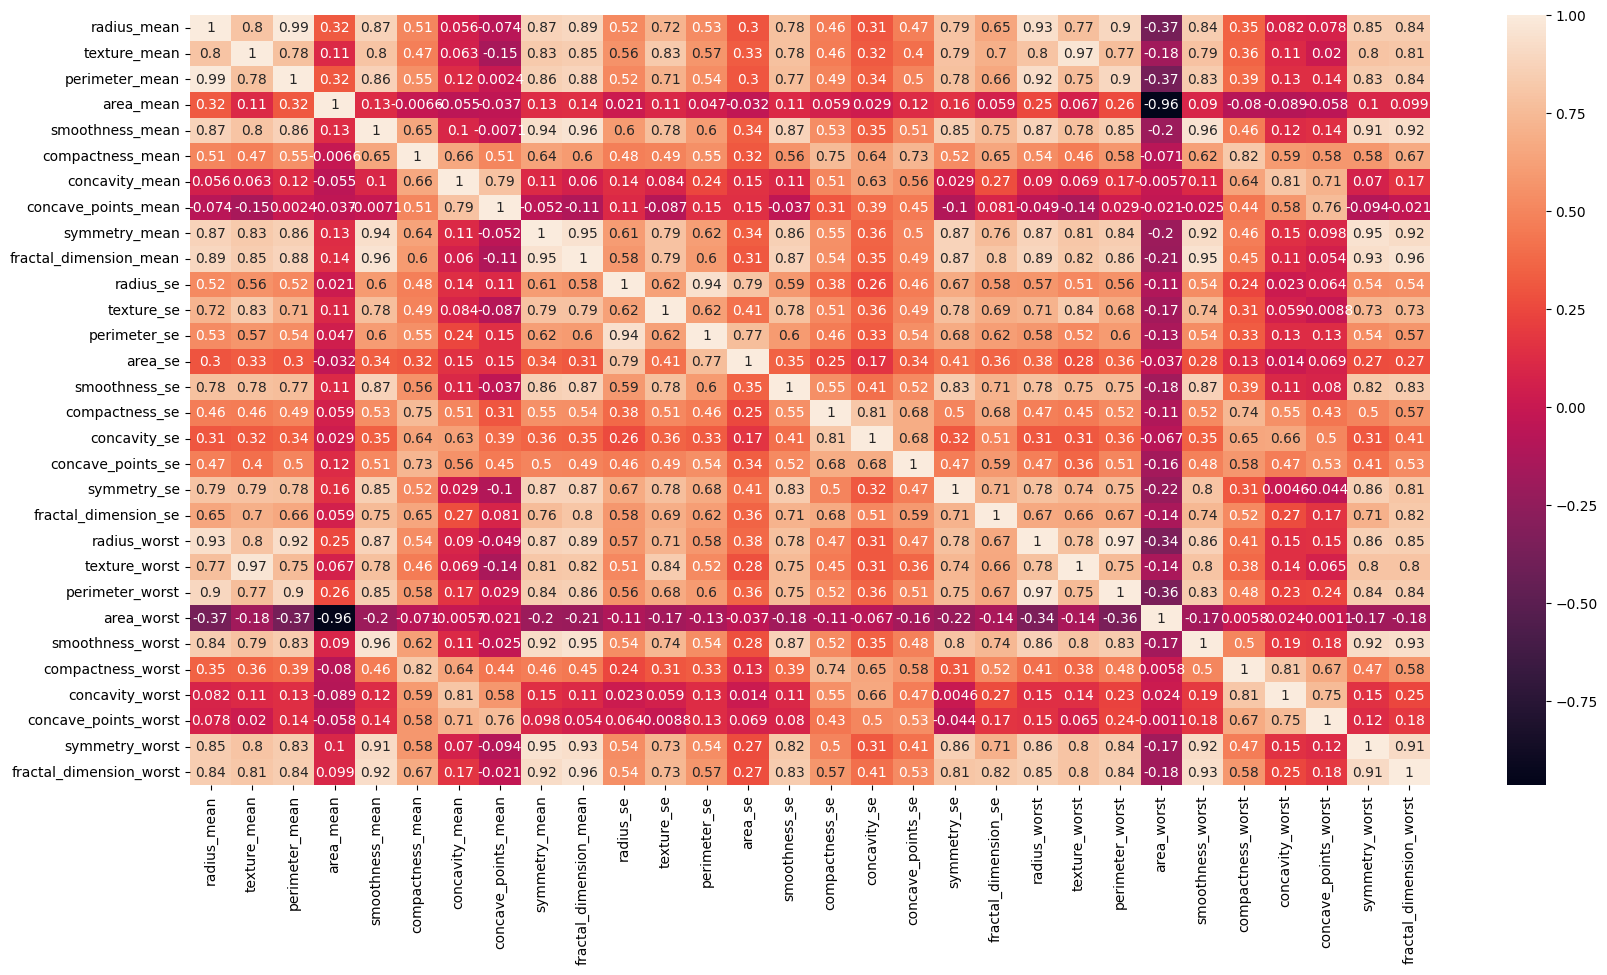

In [117]:
plt.figure(figsize=(20, 10))
sb.heatmap(features.corr(),annot=True)

main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = features
dest_path = 'visuals'
save_name = 'num_data_corr_matrix'
ext = '.jpeg'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The features are all numerical variables, hence Normalize the features.

In [45]:
target.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [46]:
# Normalizing the Features

In [47]:
help(ola.norm_scaler)

Help on function norm_scaler in module olanrewaju:

norm_scaler(file)
    This function transform the numerical columns into normalized values using the sklearn preprocessing library Normalizer.
    Input:
        file: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for all numerical columns in the dataset.



In [48]:
file = features
features = ola.norm_scaler(file)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.014571,0.008407,0.099459,0.810739,0.000096,0.000075,0.000050,0.000119,0.000196,0.000064,...,0.020556,0.014036,0.149513,0.556016,0.000131,0.000172,0.000577,0.000215,0.000229,0.000096
1,0.013623,0.011769,0.088018,0.878194,0.000056,0.000052,0.000058,0.000046,0.000120,0.000038,...,0.016551,0.015504,0.105171,0.454661,0.000082,0.000124,0.000160,0.000123,0.000182,0.000059
2,0.009375,0.010118,0.061900,0.572811,0.000052,0.000076,0.000094,0.000061,0.000099,0.000029,...,0.011223,0.012156,0.072613,0.813743,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551923,0.000137,0.000132,0.000345,0.000150,0.000256,0.000090,...,0.021314,0.037881,0.141333,0.811516,0.000188,0.000303,0.000982,0.000368,0.000403,0.000114
4,0.009893,0.006992,0.065873,0.632398,0.000049,0.000065,0.000097,0.000051,0.000088,0.000029,...,0.010990,0.008128,0.074210,0.767947,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [49]:
# Encoding the target variable

In [50]:
help(ola.ordinal_encoding)

Help on function ordinal_encoding in module olanrewaju:

ordinal_encoding(file)
    This function encodes categorical columns in pandas dataframe using sklearn preprocessing library OrdinalEncoder.
    Input:
        file: This is the pandas dataframe containing ONLY categorical columns.
    Output:
        It returns a fully encoded dataframe as ordered based on the labels in each columns for all the categorical columns.



In [51]:
file = target
target = ola.ordinal_encoding(file)
target.head()

,diagnosis
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [52]:
# Concatenate the dataframes for Normalized features with the Encoded Target

In [53]:
help(ola.concat_df)

Help on function concat_df in module olanrewaju:

concat_df(df)
    This function is used to merge two or more pandas dataframe together to become a new one. It uses the columns to merge.
    The condition to use this function is that, the numbers of rows must be the same for all the dataframes to be merged.
    This function is very useful when trying to concatenate num_data, cat_data and target_data that are splitted from a single dataset during
    transformation and encoding.
    Input:
        df: These are the different pandas dataframes having the same number of rows to be merged.
    Output:
        The function returns a merged pandas dataframe as output.



In [54]:
df = [features, target]
trans_df = ola.concat_df(df)
trans_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.014571,0.008407,0.099459,0.810739,0.000096,0.000075,0.000050,0.000119,0.000196,0.000064,...,0.014036,0.149513,0.556016,0.000131,0.000172,0.000577,0.000215,0.000229,0.000096,1.0
1,0.013623,0.011769,0.088018,0.878194,0.000056,0.000052,0.000058,0.000046,0.000120,0.000038,...,0.015504,0.105171,0.454661,0.000082,0.000124,0.000160,0.000123,0.000182,0.000059,1.0
2,0.009375,0.010118,0.061900,0.572811,0.000052,0.000076,0.000094,0.000061,0.000099,0.000029,...,0.012156,0.072613,0.813743,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042,1.0
3,0.016325,0.029133,0.110899,0.551923,0.000137,0.000132,0.000345,0.000150,0.000256,0.000090,...,0.037881,0.141333,0.811516,0.000188,0.000303,0.000982,0.000368,0.000403,0.000114,1.0
4,0.009893,0.006992,0.065873,0.632398,0.000049,0.000065,0.000097,0.000051,0.000088,0.000029,...,0.008128,0.074210,0.767947,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037,1.0


In [55]:
# Save the transformed and encoded dataframe

In [56]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = trans_df
dest_path = 'outputs'
save_name = 'trans_encode_breast_cancer'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [57]:
# Train a Model

In [58]:
help(ola.train_and_score_model)

Help on function train_and_score_model in module olanrewaju:

train_and_score_model(file, model_name, target_column)
    This function split the pandas dataframe into features and target and convert them into array.
    It uses the train_test_split library from sklearn to split the features and target into training and test set for training a mode.
    It iteratively uses the defined seedSearch on the train_test_split to fit, predict and score a training model on a range of seeds
    and select the seed that gives best score which measures its performance.

    Inputs:
        file: This is the pandas dataframe to train a model on.
        model_name: This is the model to be use for training the dataset depending on the use case and the dataset.
        target_column: This is the target column i.e the column to be predicted from the pandas dataframe.

    Output:
        This function returns a list consisting of the best accuracy and the best seed from the loop of various seeds.
     

In [59]:
from sklearn.linear_model import LogisticRegression
file = trans_df
model_name = LogisticRegression()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.7543859649122807 | best_seed is: 4


[0.7543859649122807, 4]

In [60]:
# Saving the Model

In [61]:
import os
import joblib
def saving_model_versions(main_dir, model, path, save_model_name, ext):
    '''
    This function save any predictive models into a pickle file.
    Inputs:
        main_dir: This is the parent folder for the project which is a string i.e the folder where the folder you want to save the model in is created.
        model: This is the predictive model used to train the data. Must be called without enclosing in quotation marks.
        path: This is the folder name where you want to save the model. Must be string.
        save_model_name: This is the name the model is saved with, also in strings. The user defines the name of choice.
        ext: This is the format the user want the model to be saved into. Because Joblib is the library used, we adopt '.pk' for pickle, also in strings.
    Output:
        The function automatically save the model and print a statement that confirm that it is saved in the folder specified.
    '''
    os.chdir(main_dir)
    new_path = os.getcwd() + '/' + path
    os.chdir(new_path)
    curr_time = datetime.now()
    curr_time_str = curr_time.strftime('%d-%m-%y %H-%M-%S')
    joblib.dump(model, save_model_name + '_' + curr_time_str + ext)
    print(f"The model is {save_model_name} and is saved in the {path} folder")

# Call the function
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
model = model_name
path = 'models'
save_model_name = 'LogReg_breast_model'
ext = '.pk'
saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is LogReg_breast_model and is saved in the models folder


In [62]:
from sklearn.ensemble import RandomForestClassifier
file = trans_df
model_name = RandomForestClassifier()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.9824561403508771 | best_seed is: 23


[0.9824561403508771, 23]

In [63]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
model = model_name
path = 'models'
save_model_name = 'RF_breast_model'
ext = '.pk'
saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is RF_breast_model and is saved in the models folder


##### <font color = 'green'> Selecting the most important features contibuting to detecting the breast cancer cases using RFE

##### <font color = 'grey'> Select 16 important features

In [64]:
help(ola.feature_selection_rfe)

Help on function feature_selection_rfe in module olanrewaju:

feature_selection_rfe(file, model_name, num_of_features, target_column)
    This function uses the recursive features elimination to select the important features based on the number of features specified by user.
    It split the pandas dataframe into features and target columns and convert them into arrays.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        model_name: This is the model to be used by the rfe in selecting the important features and it solely depends on the use case.
        num_of_features: This is the total number of important features you want to select from the pandas dataframe that significantly contribute
        to the prediction of the target. it must be a single value defined as a list.
        target_column: This is the target column from the pandas dataframe and must be a string.
    Output:
 

In [65]:
file = trans_df
model_name = LogisticRegression(solver='lbfgs')
num_of_features = [16]
target_column = 'diagnosis'
imp_feat = ola.feature_selection_rfe(file, model_name, num_of_features, target_column)
imp_feat

Num of features is 16


array([ True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False])

In [66]:
# Convert Important features to dataframe

In [67]:
help(ola.convert_rfe_features_to_dataframe)

Help on function convert_rfe_features_to_dataframe in module olanrewaju:

convert_rfe_features_to_dataframe(file, selected_features)
    This function convert the important array features selected by rfe into a pandas dataframe.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        selected_features: This is the rfe selected features as defined by the support_ library.
    Output:
        This returns the pandas dataframe ONLY the True important features as selected by rfe.



In [68]:
file = trans_df
selected_features = imp_feat
imp_feat = ola.convert_rfe_features_to_dataframe(file, selected_features)
imp_feat.head()

The selected index columns for features is/are: [0, 1, 2, 3, 8, 10, 11, 12, 13, 20, 21, 22, 23, 24, 26, 28]
The selected columns of features is/are: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']


,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst
0,0.014571,0.008407,0.099459,0.810739,0.000196,0.000263,0.000733,0.001852,0.019868,0.020556,0.014036,0.149513,0.556016,0.000131,0.000577,0.000229
1,0.013623,0.011769,0.088018,0.878194,0.000120,0.000360,0.000486,0.002250,0.049062,0.016551,0.015504,0.105171,0.454661,0.000082,0.000160,0.000182
2,0.009375,0.010118,0.061900,0.572811,0.000099,0.000355,0.000375,0.002183,0.011680,0.011223,0.012156,0.072613,0.813743,0.000069,0.000214,0.000172
3,0.016325,0.029133,0.110899,0.551923,0.000256,0.000708,0.001652,0.004925,0.038925,0.021314,0.037881,0.141333,0.811516,0.000188,0.000982,0.000403
4,0.009893,0.006992,0.065873,0.632398,0.000088,0.000369,0.000381,0.002651,0.011960,0.010990,0.008128,0.074210,0.767947,0.000067,0.000195,0.000115


In [69]:
# Merging selected columns with target

In [70]:
help(ola.merging_rfe_df)

Help on function merging_rfe_df in module olanrewaju:

merging_rfe_df(file, target_column, rfe_df)
    This function is use to merge the converted important features by rfe and the target to form a pandas dataframe having only the important features
    and the target column.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        target_column: This is the target column to be predicted from the dataframe.
        rfe_df: This is the pandas dataframe obtained from the converted_rfe_features_to_dataframe.
    Output:
        This returns the pandas dataframe consisting of ONLY the important features and the target column.



In [71]:
file = trans_df
target_column = 'diagnosis'
rfe_df = imp_feat
rfe_16 = ola.merging_rfe_df(file, target_column, rfe_df)
rfe_16.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,diagnosis
0,0.014571,0.008407,0.099459,0.810739,0.000196,0.000263,0.000733,0.001852,0.019868,0.020556,0.014036,0.149513,0.556016,0.000131,0.000577,0.000229,1.0
1,0.013623,0.011769,0.088018,0.878194,0.000120,0.000360,0.000486,0.002250,0.049062,0.016551,0.015504,0.105171,0.454661,0.000082,0.000160,0.000182,1.0
2,0.009375,0.010118,0.061900,0.572811,0.000099,0.000355,0.000375,0.002183,0.011680,0.011223,0.012156,0.072613,0.813743,0.000069,0.000214,0.000172,1.0
3,0.016325,0.029133,0.110899,0.551923,0.000256,0.000708,0.001652,0.004925,0.038925,0.021314,0.037881,0.141333,0.811516,0.000188,0.000982,0.000403,1.0
4,0.009893,0.006992,0.065873,0.632398,0.000088,0.000369,0.000381,0.002651,0.011960,0.010990,0.008128,0.074210,0.767947,0.000067,0.000195,0.000115,1.0


In [72]:
# Save the rfe_16 data

In [73]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = rfe_16
dest_path = 'outputs'
save_name = '16_important_features_breast_cancer'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [74]:
# Train the mode for rfe_16

In [75]:
from sklearn.ensemble import RandomForestClassifier
file = rfe_16
model_name = RandomForestClassifier()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.9707602339181286 | best_seed is: 5


[0.9707602339181286, 5]

In [76]:
# save the rfe_16 model

In [77]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
model = model_name
path = 'models'
save_model_name = 'rfe_16_important_feature_breast_model'
ext = '.pk'
saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is rfe_16_important_feature_breast_model and is saved in the models folder


##### <font color = 'grey'> Select 8 important features

In [78]:
file = trans_df
model_name = LogisticRegression(solver='lbfgs')
num_of_features = [8]
target_column = 'diagnosis'
imp_feat = ola.feature_selection_rfe(file, model_name, num_of_features, target_column)
imp_feat

Num of features is 8


array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [79]:
file = trans_df
selected_features = imp_feat
imp_feat = ola.convert_rfe_features_to_dataframe(file, selected_features)
imp_feat.head()

The selected index columns for features is/are: [0, 1, 2, 3, 20, 21, 22, 23]
The selected columns of features is/are: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']


,radius_mean,texture_mean,perimeter_mean,area_mean,radius_worst,texture_worst,perimeter_worst,area_worst
0,0.014571,0.008407,0.099459,0.810739,0.020556,0.014036,0.149513,0.556016
1,0.013623,0.011769,0.088018,0.878194,0.016551,0.015504,0.105171,0.454661
2,0.009375,0.010118,0.061900,0.572811,0.011223,0.012156,0.072613,0.813743
3,0.016325,0.029133,0.110899,0.551923,0.021314,0.037881,0.141333,0.811516
4,0.009893,0.006992,0.065873,0.632398,0.010990,0.008128,0.074210,0.767947


In [80]:
file = trans_df
target_column = 'diagnosis'
rfe_df = imp_feat
rfe_8 = ola.merging_rfe_df(file, target_column, rfe_df)
rfe_8.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,radius_worst,texture_worst,perimeter_worst,area_worst,diagnosis
0,0.014571,0.008407,0.099459,0.810739,0.020556,0.014036,0.149513,0.556016,1.0
1,0.013623,0.011769,0.088018,0.878194,0.016551,0.015504,0.105171,0.454661,1.0
2,0.009375,0.010118,0.061900,0.572811,0.011223,0.012156,0.072613,0.813743,1.0
3,0.016325,0.029133,0.110899,0.551923,0.021314,0.037881,0.141333,0.811516,1.0
4,0.009893,0.006992,0.065873,0.632398,0.010990,0.008128,0.074210,0.767947,1.0


In [81]:
# save the rfe_8 data

In [82]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = rfe_8
dest_path = 'outputs'
save_name = '8_important_features_breast_cancer'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [83]:
# Train the model for rfe_8 data

In [84]:
from sklearn.ensemble import RandomForestClassifier
file = rfe_8
model_name = RandomForestClassifier()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.9707602339181286 | best_seed is: 5


[0.9707602339181286, 5]

In [85]:
# save the rfe_8 model

In [86]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
model = model_name
path = 'models'
save_model_name = 'rfe_8_important_feature_breast_model'
ext = '.pk'
saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is rfe_8_important_feature_breast_model and is saved in the models folder


##### <font color = 'grey'> Select 4 important features

In [87]:
file = trans_df
model_name = LogisticRegression(solver='lbfgs')
num_of_features = [4]
target_column = 'diagnosis'
imp_feat = ola.feature_selection_rfe(file, model_name, num_of_features, target_column)
imp_feat

Num of features is 4


array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [88]:
file = trans_df
selected_features = imp_feat
imp_feat = ola.convert_rfe_features_to_dataframe(file, selected_features)
imp_feat.head()

The selected index columns for features is/are: [2, 3, 22, 23]
The selected columns of features is/are: ['perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst']


,perimeter_mean,area_mean,perimeter_worst,area_worst
0,0.099459,0.810739,0.149513,0.556016
1,0.088018,0.878194,0.105171,0.454661
2,0.061900,0.572811,0.072613,0.813743
3,0.110899,0.551923,0.141333,0.811516
4,0.065873,0.632398,0.074210,0.767947


In [89]:
file = trans_df
target_column = 'diagnosis'
rfe_df = imp_feat
rfe_4 = ola.merging_rfe_df(file, target_column, rfe_df)
rfe_4.head()

,perimeter_mean,area_mean,perimeter_worst,area_worst,diagnosis
0,0.099459,0.810739,0.149513,0.556016,1.0
1,0.088018,0.878194,0.105171,0.454661,1.0
2,0.061900,0.572811,0.072613,0.813743,1.0
3,0.110899,0.551923,0.141333,0.811516,1.0
4,0.065873,0.632398,0.074210,0.767947,1.0


In [90]:
# Save the rfe_4 data

In [91]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = rfe_4
dest_path = 'outputs'
save_name = '4_important_features_breast_cancer'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [92]:
# Train the model for rfe_4 data

In [93]:
from sklearn.ensemble import RandomForestClassifier
file = rfe_4
model_name = RandomForestClassifier()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.9415204678362573 | best_seed is: 10


[0.9415204678362573, 10]

In [94]:
# Save the rfe_4 model

In [95]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
model = model_name
path = 'models'
save_model_name = 'rfe_4_important_feature_breast_model'
ext = '.pk'
saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is rfe_4_important_feature_breast_model and is saved in the models folder


##### <font color = 'grey'> Select rfe_2 important features

In [96]:
file = trans_df
model_name = LogisticRegression(solver='lbfgs')
num_of_features = [2]
target_column = 'diagnosis'
imp_feat = ola.feature_selection_rfe(file, model_name, num_of_features, target_column)
imp_feat

Num of features is 2


array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [97]:
file = trans_df
selected_features = imp_feat
imp_feat = ola.convert_rfe_features_to_dataframe(file, selected_features)
imp_feat.head()

The selected index columns for features is/are: [2, 3]
The selected columns of features is/are: ['perimeter_mean', 'area_mean']


,perimeter_mean,area_mean
0,0.099459,0.810739
1,0.088018,0.878194
2,0.061900,0.572811
3,0.110899,0.551923
4,0.065873,0.632398


In [98]:
file = trans_df
target_column = 'diagnosis'
rfe_df = imp_feat
rfe_2 = ola.merging_rfe_df(file, target_column, rfe_df)
rfe_2.head()

,perimeter_mean,area_mean,diagnosis
0,0.099459,0.810739,1.0
1,0.088018,0.878194,1.0
2,0.061900,0.572811,1.0
3,0.110899,0.551923,1.0
4,0.065873,0.632398,1.0


In [99]:
# Save the rfe_2 data

In [100]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
file_name = rfe_2
dest_path = 'outputs'
save_name = '2_important_features_breast_cancer'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

In [101]:
# Train the model for rfe_2 data

In [102]:
from sklearn.ensemble import RandomForestClassifier
file = rfe_2
model_name = RandomForestClassifier()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.9298245614035088 | best_seed is: 3


[0.9298245614035088, 3]

In [103]:
# Save the rfe_2 model

In [104]:
main_dir = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Breast_Cancerous_Project'
model = model_name
path = 'models'
save_model_name = 'rfe_2_important_feature_breast_model'
ext = '.pk'
saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is rfe_2_important_feature_breast_model and is saved in the models folder


##### <font color = 'grey'> Build a Logistic Regression model with the rfe_2, rfe_4, rfe_8 and rfe_16 important features

In [105]:
from sklearn.linear_model import LogisticRegression
file = rfe_2
model_name = LogisticRegression()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.7017543859649122 | best_seed is: 4


[0.7017543859649122, 4]

In [106]:
from sklearn.linear_model import LogisticRegression
file = rfe_4
model_name = LogisticRegression()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.7368421052631579 | best_seed is: 4


[0.7368421052631579, 4]

In [107]:
from sklearn.linear_model import LogisticRegression
file = rfe_8
model_name = LogisticRegression()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.7485380116959064 | best_seed is: 4


[0.7485380116959064, 4]

In [108]:
from sklearn.linear_model import LogisticRegression
file = rfe_16
model_name = LogisticRegression()
target_column = 'diagnosis'
ola.train_and_score_model(file, model_name, target_column)

best_score is: 0.7543859649122807 | best_seed is: 4


[0.7543859649122807, 4]

###### <font color = 'grey'> Based on the above work, it could be seen that with important features selection we see the different behaviour depending on the performance in terms of accuarcy of the predictive model.

###### <font color = 'grey'> When the RFE selected eight of the features that strongly contributed to the determination if a breast cancer is Maligma or belign, the accuracy perform at `95.9%`. The features are: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'].

###### <font color = 'grey'> Selecting fewer important features makes the performance dropped to about `94.2%`, this is still a very good result and it implies that, spending more in gathering eight different features in determining the breast cancer cases, selecting four features will still be able to provide the necessary results and this will have save a huge cost in information gathering and reduce time. The features are: ['perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst'].

###### <font color = 'grey'> Generally speaking, in determining if breast cancer is prevalent or not, physician need to centrally focus on the just two of the features and they include: ['perimeter_mean', 'area_mean'] with a performance of `92.98%`. It could further be analysed that, for any breast cancer diagnosis, physician ONLY need to determine the perimeter and area covered by this cancerous cell and once these are known, the model is capable of determining the cancer cases in human. The model is based on the RandomForestClassifier as it best for classification problems as in this use case.

###### <font color = 'grey'> This is major milestone as health related data especially for breast cancer do not necessarily need to spend more time or cost before determining its severity.

###### <font color = 'grey'> The use of a `self built machine learning pipelines` to solve classical machine learning problems up to model building is a great achievement for me and more collaboration are welcome.

###### <font color = 'grey'> More work are ongoing to deploy more fine-tuning techniques to further ascertain more realities.

In [109]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [110]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.014571,0.008407,0.099459,0.810739,0.000096,0.000075,0.000050,0.000119,0.000196,0.000064,...,0.020556,0.014036,0.149513,0.556016,0.000131,0.000172,0.000577,0.000215,0.000229,0.000096
1,0.013623,0.011769,0.088018,0.878194,0.000056,0.000052,0.000058,0.000046,0.000120,0.000038,...,0.016551,0.015504,0.105171,0.454661,0.000082,0.000124,0.000160,0.000123,0.000182,0.000059
2,0.009375,0.010118,0.061900,0.572811,0.000052,0.000076,0.000094,0.000061,0.000099,0.000029,...,0.011223,0.012156,0.072613,0.813743,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551923,0.000137,0.000132,0.000345,0.000150,0.000256,0.000090,...,0.021314,0.037881,0.141333,0.811516,0.000188,0.000303,0.000982,0.000368,0.000403,0.000114
4,0.009893,0.006992,0.065873,0.632398,0.000049,0.000065,0.000097,0.000051,0.000088,0.000029,...,0.010990,0.008128,0.074210,0.767947,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [111]:
target.head()

,diagnosis
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [112]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, features, target)
cv_results

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: 

{'fit_time': array([0.35905957, 0.31896138, 0.2790215 , 0.26115584, 0.26694036]),
 'score_time': array([0.00175118, 0.0160594 , 0.01554799, 0.        , 0.        ]),
 'test_score': array([0.93859649, 0.93859649, 0.97368421, 0.95614035, 0.96460177])}

In [113]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The accuracy is: 0.954 ± 0.014


In [114]:
fit_time = cv_results["fit_time"]
print(f"The fitting time is: {fit_time.mean():.3f} ± {fit_time.std():.3f}")

The fitting time is: 0.297 ± 0.037


In [115]:
score_time = cv_results["score_time"]
print(f"The scoring time is: {score_time.mean():.3f} ± {score_time.std():.3f}")

The scoring time is: 0.007 ± 0.007
